In [29]:
# Libraries
import io
import os
import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.renderers.default = "png"

In [30]:
# Helper functions

profile_formatter = (
    "s3://cellpainting-gallery/cpg0016-jump/"
    "{Metadata_Source}/workspace/profiles/"
    "{Metadata_Batch}/{Metadata_Plate}/{Metadata_Plate}.parquet"
)

loaddata_formatter = (
    "s3://cellpainting-gallery/cpg0016-jump/"
    "{Metadata_Source}/workspace/load_data_csv/"
    "{Metadata_Batch}/{Metadata_Plate}/load_data_with_illum.parquet"
)

In [31]:
#Load metadata info for entire dataset

if "WORKSPACE_BUCKET" in os.environ:
    # This notebook is running on Terra.
    # Notebook 'workspace_setup.ipynb' cloned the git repo to this directory under $HOME.
    # If you cloned this repository manually to a different directory, edit this value to reflect that location.
    GIT_CLONE_DIR = "~/jump-cellpainting-datasets"
else:
    GIT_CLONE_DIR = "./datasets/"

In [32]:
#METADATA
plates = pd.read_csv(os.path.join(GIT_CLONE_DIR, "metadata/plate.csv.gz"))
wells = pd.read_csv(os.path.join(GIT_CLONE_DIR, "metadata/well.csv.gz"))
compound = pd.read_csv(os.path.join(GIT_CLONE_DIR, "metadata/compound.csv.gz"))
orf = pd.read_csv(os.path.join(GIT_CLONE_DIR, "metadata/orf.csv.gz"))

In [33]:
sample = (
    plates.query('Metadata_PlateType=="COMPOUND"')
    .sample(10, random_state=40)
)
sample

,Metadata_Source,Metadata_Batch,Metadata_Plate,Metadata_PlateType
255,source_10,2021_08_23_U2OS_48_hr_run18,Dest210823-174733,COMPOUND
2191,source_8,J3,A1170518,COMPOUND
1444,source_5,JUMPCPE-20210702-Run04_20210703_060202,APTJUM129,COMPOUND
2320,source_9,20210918-Run11,GR00004367,COMPOUND
201,source_10,2021_08_12_U2OS_48_hr_run15,Dest210803-154929,COMPOUND
74,source_10,2021_06_01_U2OS_48_hr_run2,Dest210601-155546,COMPOUND
1625,source_5,JUMPCPE-20210908-Run28_20210909_072022,AETJUM107,COMPOUND
370,source_11,Batch3,EC000158,COMPOUND
288,source_11,Batch1,EC000012,COMPOUND
1979,source_7,20210727_Run3,CP3-SC1-07,COMPOUND


For feature dataset:

In [7]:
# load profiles of all plates
dframes = []
i = 0
u = len(sample)
# columns = ["Cells_AreaShape_Exent"]
# # ["Count"]
columns = [
    "Metadata_Source",
    "Metadata_Plate",
    "Metadata_Well",
]
for _, row in sample.iterrows():
    s3_path = profile_formatter.format(**row.to_dict())
    dframes.append(
        pd.read_parquet(s3_path, storage_options={"anon": True}, columns=columns)
    )
    i+=1
    print("profile " + str(i) + " of " + str(u) + " complete")
    
dframes = pd.concat(dframes)

profile 1 of 10 complete
profile 2 of 10 complete
profile 3 of 10 complete
profile 4 of 10 complete
profile 5 of 10 complete
profile 6 of 10 complete
profile 7 of 10 complete
profile 8 of 10 complete
profile 9 of 10 complete
profile 10 of 10 complete


In [8]:
dframes

,Metadata_Source,Metadata_Plate,Metadata_Well
0,source_2,1086292495,A01
1,source_2,1086292495,A02
2,source_2,1086292495,A03
3,source_2,1086292495,A04
4,source_2,1086292495,A05
...,...,...,...
379,source_3,SP09P12a,P20
380,source_3,SP09P12a,P21
381,source_3,SP09P12a,P22
382,source_3,SP09P12a,P23


In [9]:
# merge compounds and wells, then merge all metadata to plates list (dframes)
metadata = compound.merge(wells, on="Metadata_JCP2022")
ann_dframe = metadata.merge(
    dframes, on=["Metadata_Source", "Metadata_Plate", "Metadata_Well"]
)

In [10]:
ann_dframe

,Metadata_JCP2022,Metadata_InChIKey,Metadata_InChI,Metadata_Source,Metadata_Plate,Metadata_Well
0,JCP2022_000025,AACNFBWTGDBFJF-UHFFFAOYSA-N,InChI=1S/C18H20ClNO4S/c1-24-16-6-8-17(9-7-16)2...,source_5,APTJUM230,M13
1,JCP2022_000061,AAHMGAQUWYRISL-UHFFFAOYSA-N,InChI=1S/C19H17F3N2OS/c1-12(18-23-15-8-3-4-9-1...,source_1,UL000093,W15
2,JCP2022_000138,AAQWECHAUNCROD-UHFFFAOYSA-N,InChI=1S/C21H21N3O4/c1-26-16-9-10-18(19(13-16)...,source_3,SP09P12a,L14
3,JCP2022_000165,AAVFZPLWDJMVKL-UHFFFAOYSA-N,InChI=1S/C18H15BrN2O3S/c1-13-8-9-14(12-16(13)2...,source_3,SP09P12a,C16
4,JCP2022_000186,AAXKWRZLAIGHCB-UHFFFAOYSA-N,InChI=1S/C18H23F3N2O4/c1-17(16(25)22-8-10-26-2...,source_1,UL000093,T24
...,...,...,...,...,...,...
5968,JCP2022_116743,ZZYGAYQSBWEALR-UHFFFAOYSA-N,InChI=1S/C18H22N2O7/c1-22-15-11(8-14-16(17(15)...,source_3,J12440dW,B22
5969,JCP2022_999999,NaN,NaN,source_3,SP09P12a,E14
5970,JCP2022_999999,NaN,NaN,source_3,SP09P12a,G14
5971,JCP2022_999999,NaN,NaN,source_3,SP09P12a,O12


For image loading:

In [11]:
#gather metadata associated with images
load_data = []
i = 0
u = len(sample)
for _, row in sample.iterrows():
    s3_path = loaddata_formatter.format(**row.to_dict())
    load_data.append(pd.read_parquet(s3_path, storage_options={"anon": True}))
    i+=1
    print("profile " + str(i) + " of " + str(u) + " complete")

load_data = pd.concat(load_data)

profile 1 of 10 complete
profile 2 of 10 complete
profile 3 of 10 complete
profile 4 of 10 complete
profile 5 of 10 complete
profile 6 of 10 complete
profile 7 of 10 complete
profile 8 of 10 complete
profile 9 of 10 complete
profile 10 of 10 complete


In [12]:
# link metadata with image filepaths
linked = pd.merge(
    load_data, ann_dframe, on=["Metadata_Source", "Metadata_Plate", "Metadata_Well"]
)
linked[["Metadata_Well", "Metadata_Site"]]

,Metadata_Well,Metadata_Site
0,A01,1
1,A01,2
2,A01,3
3,A01,4
4,A01,5
...,...,...
36716,P24,5
36717,P24,6
36718,P24,7
36719,P24,8


Example to see a single image

Convert images to tensors

996 996
image 1 of 50 complete
996 996
image 2 of 50 complete
996 996
image 3 of 50 complete
996 996
image 4 of 50 complete
996 996
image 5 of 50 complete
996 996
image 6 of 50 complete
996 996
image 7 of 50 complete
996 996
image 8 of 50 complete
996 996
image 9 of 50 complete
996 996
image 10 of 50 complete
996 996
image 11 of 50 complete
996 996
image 12 of 50 complete
996 996
image 13 of 50 complete
996 996
image 14 of 50 complete
996 996
image 15 of 50 complete
996 996
image 16 of 50 complete
996 996
image 17 of 50 complete
996 996
image 18 of 50 complete
996 996
image 19 of 50 complete
996 996
image 20 of 50 complete
996 996
image 21 of 50 complete
996 996
image 22 of 50 complete
996 996
image 23 of 50 complete
996 996
image 24 of 50 complete
996 996
image 25 of 50 complete
996 996
image 26 of 50 complete
996 996
image 27 of 50 complete
996 996
image 28 of 50 complete
996 996
image 29 of 50 complete
996 996
image 30 of 50 complete
996 996
image 31 of 50 complete
996 996
image 32 

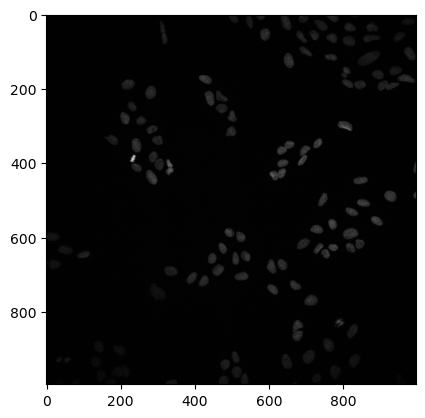

In [34]:
import os
import requests
from io import BytesIO
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import boto3
from botocore import UNSIGNED
from botocore.config import Config
i = 0
u = 50 #len(linked)
test_images = []
test_targets = []
train_images = []
train_targets = []
all_targets = []
all_images = []
for _, row in linked.iterrows():
    image_url = os.path.join(
        row.PathName_OrigDNA, row.FileName_OrigDNA
    )
    s3_client = boto3.client("s3", config=Config(signature_version=UNSIGNED))
    response = s3_client.get_object(
        Bucket=image_url.split("/")[2], Key="/".join(image_url.split("/")[3:])
    )
    image = mpimg.imread(BytesIO(response["Body"].read()), format="tiff")
    target = row.Metadata_InChIKey

    plt.imshow(image, cmap = "gray") # , cmap="gray"
    image_url
    print(len(image), len(image[0]))
    all_targets.append(target)
#     print(os.stat(image_url).st_size)
    all_images.append(image)
    if i < u/2:
        train_images.append(image)
        train_targets.append(target)
    else:
        test_images.append(image)
        test_targets.append(target)
        
    i+=1
    print("image " + str(i) + " of " + str(u) + " complete")
    if i == u:
        break
    

image 1 of 500 complete
image 2 of 500 complete
image 3 of 500 complete
image 4 of 500 complete
image 5 of 500 complete
image 6 of 500 complete
image 7 of 500 complete
image 8 of 500 complete
image 9 of 500 complete
image 10 of 500 complete
image 11 of 500 complete
image 12 of 500 complete
image 13 of 500 complete
image 14 of 500 complete
image 15 of 500 complete
image 16 of 500 complete
image 17 of 500 complete
image 18 of 500 complete
image 19 of 500 complete
image 20 of 500 complete
image 21 of 500 complete
image 22 of 500 complete
image 23 of 500 complete
image 24 of 500 complete
image 25 of 500 complete
image 26 of 500 complete
image 27 of 500 complete
image 28 of 500 complete
image 29 of 500 complete
image 30 of 500 complete
image 31 of 500 complete
image 32 of 500 complete
image 33 of 500 complete
image 34 of 500 complete
image 35 of 500 complete
image 36 of 500 complete
image 37 of 500 complete
image 38 of 500 complete
image 39 of 500 complete
image 40 of 500 complete
image 41 

image 321 of 500 complete
image 322 of 500 complete
image 323 of 500 complete
image 324 of 500 complete
image 325 of 500 complete
image 326 of 500 complete
image 327 of 500 complete
image 328 of 500 complete
image 329 of 500 complete
image 330 of 500 complete
image 331 of 500 complete
image 332 of 500 complete
image 333 of 500 complete
image 334 of 500 complete
image 335 of 500 complete
image 336 of 500 complete
image 337 of 500 complete
image 338 of 500 complete
image 339 of 500 complete
image 340 of 500 complete
image 341 of 500 complete
image 342 of 500 complete
image 343 of 500 complete
image 344 of 500 complete
image 345 of 500 complete
image 346 of 500 complete
image 347 of 500 complete
image 348 of 500 complete
image 349 of 500 complete
image 350 of 500 complete
image 351 of 500 complete
image 352 of 500 complete
image 353 of 500 complete
image 354 of 500 complete
image 355 of 500 complete
image 356 of 500 complete
image 357 of 500 complete
image 358 of 500 complete
image 359 of

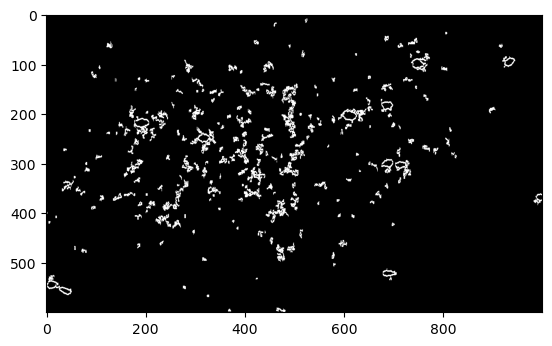

In [25]:
import cv2
import numpy as np
i = 0
u = 500
counts = []
for _, row in linked.iterrows():
    image_url = os.path.join(
        row.PathName_OrigDNA, row.FileName_OrigDNA
    )
    s3_client = boto3.client("s3", config=Config(signature_version=UNSIGNED))
    response = s3_client.get_object(
        Bucket=image_url.split("/")[2], Key="/".join(image_url.split("/")[3:])
    )
    image = mpimg.imread(BytesIO(response["Body"].read()), format="tiff")
    target = row.Metadata_InChIKey
    image = cv2.resize(image, (1000, 600)) 

    th, threshedImg = cv2.threshold(image, 30, 255,cv2.THRESH_TOZERO_INV)
    img_blur = cv2.GaussianBlur(threshedImg, (3,3), 0) 
    sobelxy = cv2.Sobel(src=img_blur, 
                        ddepth=cv2.CV_64F, 
                        dx=1, dy=1, ksize=5)
    img_blur_uint = np.uint8(img_blur)
    edges = cv2.Canny(image=img_blur_uint, 
                      threshold1=20, 
                      threshold2=65)
    dilated =cv2.dilate(edges,(1,1), iterations =2)    # Dilation is used to observe changes
    plt.imshow(dilated, cmap='gray')
    
    (cnt, heirarchy ) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    rgb =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.drawContours(rgb, cnt, -1, (0,255,0),2)
    
#     print(len(cnt))
    counts.append(len(cnt))
    

#     cv2.imshow('thresh', threshedImg)
#     cv2.imshow('Canny Edge Detection', edges)
#     cv2.waitKey(5000)
    
    
    
    
    i+=1
    print("image " + str(i) + " of " + str(u) + " complete")
    if i == u:
        break
print("counts", counts)
print("avg", np.mean(counts))








In [69]:
# pytorch libraries
import numpy as np

from tqdm import tqdm, trange

import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import Dataset, DataLoader

from torchvision.transforms import ToTensor
from sklearn.preprocessing import LabelEncoder

np.random.seed(0)
torch.manual_seed(0)

In [70]:
# get number of unique labels
unique_vals = set(all_targets)
num_targets = len(unique_vals)
print(num_targets)
# print(unique_vals)
unique_train_vals = set(train_targets)
unique_test_vals = set(test_targets)
print(len(unique_train_vals))
print(len(unique_test_vals))

17
9
9


In [71]:
# convert labels (strings) into tensor
label_encoder = LabelEncoder()
numerical_labels_train = label_encoder.fit_transform(train_targets)
numerical_labels_test = label_encoder.fit_transform(test_targets)
print(len(numerical_labels_train))
# print(numerical_labels_train)

50


In [72]:
original_labels_train = label_encoder.inverse_transform(numerical_labels_train)
original_labels_test = label_encoder.inverse_transform(numerical_labels_test)

In [73]:
train_labels = torch.from_numpy(numerical_labels_train)
test_labels = torch.from_numpy(numerical_labels_test)

In [74]:
# transform = ToTensor() # transform images into pytorch tensors

# convert images into int and transfrom into tensors
for i in range(len(train_images)):
    trainimage = train_images[i].astype(int)
#     num = numerical_labels[i].astype(int)
    train_images[i] = trainimage #tensor_image

#     numerical_labels[i] = num

for j in range(len(test_images)):
    testimage = test_images[j].astype(int)
    test_images[j] = testimage
# size: 1x1080x1080


In [75]:
# print(len(train_labels))
# print(len(train_targets))
# print(len(train_images))
# print(train_labels)


In [76]:
class CustomImageDataset(Dataset):
    def __init__(self, images, targets, transform=None):
        self.images = images
        self.targets = targets
        self.transform = transform
#         self.target_transform = target_transform

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        image = self.images[idx]
        target = self.targets[idx]

        if self.transform:
            image = self.transform(image)
#         if self.target_transform:
#             target = self.target_transform(target)
        
        return image, target

In [77]:
transform = ToTensor()
train_dataset = CustomImageDataset(train_images, train_labels, transform)
test_dataset = CustomImageDataset(test_images, test_labels, transform)

In [78]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [79]:
# train_features, train_labels = next(iter(train_loader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[3].squeeze()
# label = train_labels[0]
# plt.imshow(img, cmap="gray")
# plt.show()
# print(f"Label: {label}")

In [80]:
# train_features, train_labels = next(iter(train_loader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[4].squeeze()
# label = train_labels[0]
# plt.imshow(img, cmap="gray")
# plt.show()
# print(f"Label: {label}")

In [81]:
# building the transformer model for image classification
class Transformer(nn.Module):
      def __init__(self, chw, n_patches=7, n_blocks=2, hidden_d=8, n_heads=2, out_d=2):
        # Super constructor
        super(Transformer, self).__init__()

        #create the transformer layers with given parameters
        self.chw = chw # attribute that represents # of channels (C), height (H), and Width(W) of the images
        self.n_patches = n_patches # number of patches to divide the input image into
        self.n_blocks = n_blocks # number of transformer blocks/layers in the model
        self.n_heads = n_heads # the number of attention heads in the multi-head self-attention mechanism.
        self.hidden_d = hidden_d # specifies the dimensionality of the hidden layers within the transformer.


        # Assert that the second dimension of the input shape (height) is divisible by the number of patches.
        # If this condition is not met, it would indicate that the input cannot be evenly divided into patches.
        assert chw[1] % n_patches == 0, "Input shape not entirely divisible by number of patches"

        # Assert that the third dimension of the input shape (width) is divisible by the number of patches.
        # Similar to the previous assertion, this ensures even division of the input into patches.
        assert chw[2] % n_patches == 0, "Input shape not entirely divisible by the number of patches"

        # Linear mapper
        self.patch_size = (chw[1] / n_patches, chw[2] / n_patches)

        # Define a linear layer (self.linear_mapper) using PyTorch's nn.Linear module.
        self.input_d = int(chw[0] * self.patch_size[0] * self.patch_size[1])
        self.linear_mapper = nn.Linear(self.input_d, self.hidden_d)

        # Create a class token as a learnable parameter using PyTorch's nn.Parameter.
        self.class_token = nn.Parameter(torch.rand(1, self.hidden_d))

        # Register positional embeddings as a buffer in the model.
        self.register_buffer('positional_embeddings', get_positional_embeddings(n_patches ** 2 + 1, hidden_d), persistent=False)

        # Create a list of transformer encoder blocks using nn.ModuleList.
        self.blocks = nn.ModuleList([MyViTBlock(hidden_d, n_heads) for _ in range(n_blocks)])

        # Define an MLP (Multi-Layer Perceptron) using PyTorch's nn.Sequential module.
        self.mlp = nn.Sequential(
            nn.Linear(self.hidden_d, out_d),  # Linear transformation
            nn.Softmax(dim=-1)  # Softmax activation for probability distribution
        )

      def forward(self, images):
          # Dividing images into patches
          n, c, h, w = images.shape

          # Create patches by dividing the input 'images' into non-overlapping patches.
          # The resulting 'patches' is a tensor containing the divided patches of the input 'images', ready for further processing.
          patches = patchify(images, self.n_patches).to(self.positional_embeddings.device)



          # Running linear layer tokenization
          tokens = self.linear_mapper(patches)

          # Adding classification token to the tokens
          tokens = torch.cat((self.class_token.expand(n, 1, -1), tokens), dim=1)

          # Adding positional embedding
          # This ensures that the positional embeddings align with each patch in the batch.
          out = tokens + self.positional_embeddings.repeat(n, 1, 1)

          # Transformer Blocks
          # This process helps the model capture complex patterns and dependencies within the data.
          for block in self.blocks:
              out = block(out)

          # Getting the classification token only
          out = out[:, 0]

          return self.mlp(out)  # Map to output dimension, output category distribution






In [82]:
# Define a PyTorch module called 'MyMSA' for Multi-Head Self-Attention.
class MyMSA(nn.Module):
    def __init__(self, d, n_heads=2):
        super(MyMSA, self).__init__()

        # Initialize the module with the specified parameters.

        # 'd' represents the dimensionality of the model's hidden layers.
        self.d = d

        # 'n_heads' represents the number of attention heads to use in the self-attention mechanism.
        # It determines how many different patterns or features the model can attend to.
        self.n_heads = n_heads

        # Check if the dimension 'd' is evenly divisible by the number of attention heads 'n_heads'.
        # In the context of self-attention, the dimension should be divisible to ensure a valid splitting of attention.
        # 'd' represents the dimensionality of the hidden layers in the model.
        # 'n_heads' represents the number of attention heads to be used in the self-attention mechanism.
        # If 'd' is not divisible by 'n_heads', it would indicate an incompatible configuration for self-attention,
        # and an error message is raised with an explanation.
        assert d % n_heads == 0, f"Can't divide dimension {d} into {n_heads} heads"

        # Calculate the dimension of each attention head 'd_head' by dividing the total dimension 'd' by the number of heads 'n_heads'.
        d_head = int(d / n_heads)

        # Create separate linear mappings for queries, keys, and values for each attention head using nn.ModuleList.
        # These linear mappings transform input data for self-attention calculations.
        # 'd_head' is the input dimension, and each head has its linear transformation.
        self.q_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.k_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])
        self.v_mappings = nn.ModuleList([nn.Linear(d_head, d_head) for _ in range(self.n_heads)])

        # Store the dimension of each attention head 'd_head' as an instance variable.
        self.d_head = d_head

        # Define a softmax layer to compute attention weights along the last dimension.
        # 'dim=-1' specifies that the softmax is applied along the last dimension of the input.
        self.softmax = nn.Softmax(dim=-1)

    # Define the forward method, which outlines how data is processed through the MyMSA module.
    # 'sequences' typically represent a sequence of data, which will undergo the self-attention mechanism.
    def forward(self, sequences):
    # The actual operations for self-attention and processing of 'sequences' would be defined within this method.
      # Initialize a loop to process each sequence in 'sequences' and each attention head.

        result = []  # Initialize a list to store the results.
        for sequence in sequences:
            seq_result = []  # Initialize a list to store results for each sequence.
            for head in range(self.n_heads):
                # Obtain the query, key, and value mappings for the current attention head.
                q_mapping = self.q_mappings[head]  # Query mapping
                k_mapping = self.k_mappings[head]  # Key mapping
                v_mapping = self.v_mappings[head]  # Value mapping

                # Extract a portion of the input sequence and apply query, key, and value mappings for the current attention head.

                seq = sequence[:, head * self.d_head: (head + 1) * self.d_head]
                # 'seq' selects a specific portion of the input 'sequence' based on the current attention head.
                # It partitions the sequence into segments corresponding to each head's dimension.

                # Apply the query, key, and value mappings to 'seq'.
                q, k, v = q_mapping(seq), k_mapping(seq), v_mapping(seq)
                # 'q', 'k', and 'v' represent the query, key, and value tensors obtained by mapping 'seq' using
                # the query, key, and value mappings defined for the current attention head.

                # Calculate attention scores and perform self-attention to obtain the output for the current attention head.

                # Calculate attention scores using the dot product between queries (q) and keys (k).
                attention = self.softmax(q @ k.T / (self.d_head ** 0.5))
                # 'self.d_head ** 0.5' is used to scale the dot product by the square root of the dimension for numerical stability.

                # Perform self-attention by computing the weighted sum of values (v) based on the attention scores.
                seq_result.append(attention @ v)

            # Append the output to 'seq_result' for the current attention head.
            result.append(torch.hstack(seq_result))

        # Concatenate the results from different attention heads and sequences to create the final output.
        # 'result' is a list that contains results for different sequences and attention heads.
        # The list comprehension creates a list of tensors, each with one extra dimension added using 'torch.unsqueeze'.
        # This is done to ensure that all tensors have the same shape for concatenation.
        # 'torch.cat' concatenates the tensors along a new dimension (dimension 0) to create the final output.
        return torch.cat([torch.unsqueeze(r, dim=0) for r in result])


In [83]:
# Define a PyTorch module 'MyViTBlock' for a building block in a Vision Transformer (ViT) model.
class MyViTBlock(nn.Module):
    def __init__(self, hidden_d, n_heads, mlp_ratio=4):
        super(MyViTBlock, self).__init__()

        # Initialize the module with the specified parameters.

        # 'hidden_d' represents the dimensionality of the model's hidden layers.
        self.hidden_d = hidden_d

        # 'n_heads' represents the number of attention heads to use in the self-attention mechanism.
        self.n_heads = n_heads

        # 'mlp_ratio' is a hyperparameter that determines the ratio of dimensions in the MLP layer relative to 'hidden_d'.
        # The default value is set to 4.

        # Initialize Layer Normalization for the self-attention output.
        self.norm1 = nn.LayerNorm(hidden_d)

        # Initialize the Multi-Head Self-Attention (MHSA) layer.
        self.mhsa = MyMSA(hidden_d, n_heads)

        # Initialize Layer Normalization for the MLP output.
        self.norm2 = nn.LayerNorm(hidden_d)

        # Initialize the Multi-Layer Perceptron (MLP) layer.
        self.mlp = nn.Sequential(
            nn.Linear(hidden_d, mlp_ratio * hidden_d),  # Linear layer with an increased dimension.
            nn.GELU(),  # GELU activation function for non-linearity.
            nn.Linear(mlp_ratio * hidden_d, hidden_d)  # Linear layer to reduce dimension back to 'hidden_d'.
        )

    def forward(self, x):
        # Forward pass through the ViT block, including MHSA and MLP layers.
        # 'x' is the input to the block.
        # The output 'out' is the result after applying self-attention and MLP layers.
        out = x + self.mhsa(self.norm1(x))
        out = out + self.mlp(self.norm2(out))
        return out

In [84]:
# Define a function 'patchify' to divide a batch of images into non-overlapping patches.

def patchify(images, n_patches):
    n, c, h, w = images.shape  # Get the dimensions of the input images.

    # Ensure that the input images are square (height equals width).
    assert h == w, "Patchify method is implemented for square images only"

    # Initialize a tensor 'patches' to store the patches for each image.
    patches = torch.zeros(n, n_patches ** 2, h * w * c // n_patches ** 2)

    # Calculate the size of each patch based on the number of patches.
    patch_size = h // n_patches

    for idx, image in enumerate(images):
        # Iterate through each image in the batch.
        for i in range(n_patches):
            for j in range(n_patches):
                # Extract a patch from the image.
                patch = image[:, i * patch_size: (i + 1) * patch_size, j * patch_size: (j + 1) * patch_size]
                # Flatten the patch and store it in the 'patches' tensor.
                patches[idx, i * n_patches + j] = patch.flatten()

    # Return the 'patches' tensor containing the divided patches.
    return patches

In [85]:
# Define a function 'get_positional_embeddings' to generate positional embeddings for tokens in a sequence.

def get_positional_embeddings(sequence_length, d):
    # Initialize a matrix 'result' to store positional embeddings.
    result = torch.ones(sequence_length, d)

    # Iterate through each token in the sequence and each dimension of the embeddings.
    for i in range(sequence_length):
        for j in range(d):
            if j % 2 == 0:
                # Use sine function for even dimensions.
                result[i][j] = np.sin(i / (10000 ** (j / d)))
            else:
                # Use cosine function for odd dimensions.
                result[i][j] = np.cos(i / (10000 ** ((j - 1) / d)))

    # Return the 'result' matrix containing the computed positional embeddings.
    return result

In [86]:
# Set up the device for training and initialize training parameters.

# Use a GPU (cuda) if available; otherwise, use the CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the selected device and its name (if GPU is available).
print("Using device: ", device, f"({torch.cuda.get_device_name(device)})" if torch.cuda.is_available() else "")

# Initialize the model with specific configuration and move it to the selected device.
model = Transformer((1, 1080, 1080), n_patches=40, n_blocks=2, hidden_d=8, n_heads=2, out_d=num_targets).to(device)

# Define the number of training epochs.
N_EPOCHS = 5

# Set the learning rate for training.
LR = 0.005

Using device:  cpu 


In [87]:
# Training loop for training the PyTorch model.

# Initialize an Adam optimizer for updating model parameters with the specified learning rate.
optimizer = Adam(model.parameters(), lr=LR)

# Define the loss function for training, which is Cross-Entropy Loss for classification tasks.
criterion = CrossEntropyLoss()

# Iterate through each training epoch.
for epoch in trange(N_EPOCHS, desc="Training"):
    # Initialize the training loss for this epoch.
    train_loss = 0.0

    # Iterate through batches of training data.
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1} in training", leave=False):
        # Get the input data 'x' and target labels 'y' from the batch.
        x, y = batch
        print("X", x)
        print("Y", y)
        x, y = x.to(device), y.to(device)  # Move data to the selected device.

        # Forward pass through the model to obtain predictions 'y_hat'.
        y_hat = model(x)

        # Compute the loss between predicted and actual labels.
        loss = criterion(y_hat, y)

        # Update the training loss for this epoch.
        train_loss += loss.detach().cpu().item() / len(train_loader)

        # Perform backpropagation: zero gradients, compute gradients, and update model parameters.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print the training loss for the current epoch.
    print(f"Epoch {epoch + 1}/{N_EPOCHS} loss: {train_loss:.2f}")


# Testing loop for evaluating the PyTorch model on a test dataset.

# Use 'torch.no_grad()' to ensure that no gradients are calculated during testing.
with torch.no_grad():
    correct, total = 0, 0  # Initialize variables to keep track of correct predictions and the total number of samples.
    test_loss = 0.0  # Initialize the test loss.

    # Iterate through batches of the test dataset.
    for batch in tqdm(test_loader, desc="Testing"):
        x, y = batch
        x, y = x.to(device), y.to(device)  # Move data to the selected device.

        # Forward pass through the model to obtain predictions 'y_hat'.
        y_hat = model(x)

        # Compute the test loss for this batch.
        loss = criterion(y_hat, y)
        test_loss += loss.detach().cpu().item() / len(test_loader)

        # Calculate the number of correct predictions and update the 'correct' count.
        correct += torch.sum(torch.argmax(y_hat, dim=1) == y).detach().cpu().item()

        # Update the 'total' count with the number of samples in the current batch.
        total += len(x)

    # Print the test loss and test accuracy.
    print(f"Test loss: {test_loss:.2f}")
    print(f"Test accuracy: {correct / total * 100:.2f}%")


Training:   0%|                                           | 0/5 [00:00<?, ?it/s]


X tensor([[[[117, 144, 137,  ...,   5,  23,  12],
          [112, 111, 121,  ...,  19,  17,  23],
          [134, 103, 138,  ...,  11,   9,  20],
          ...,
          [ 12,  11,   2,  ...,  14,   7,  12],
          [ 23,   4,  23,  ...,  18,   8,  10],
          [ 13,  15,  16,  ...,   3,  23,   0]]],


        [[[ 33,   5,  21,  ...,  24,  20,   8],
          [  6,   0,  17,  ...,   1,  10,  10],
          [ 24,   2,  21,  ...,  15,   8,   9],
          ...,
          [ 14,  22,  43,  ...,   0,  18,  15],
          [ 30,  26,  19,  ...,  41,  11,  10],
          [ 19,  12,  21,  ...,   0,  17,   9]]],


        [[[ 35,   5,  20,  ...,  13,  18,   4],
          [ 33,   0,  24,  ...,   8,  21,  17],
          [  8,  25,   5,  ...,  18,   9,  14],
          ...,
          [ 24,  23,  24,  ...,  16,  18,   0],
          [  4,  17,  17,  ...,  28,   1,   2],
          [ 16,  20,  17,  ...,  15,  28,   3]]],


        ...,


        [[[ 18,  21,   9,  ...,   5,  35,  13],
          [ 38

RuntimeError: The expanded size of the tensor (620) must match the existing size (576) at non-singleton dimension 0.  Target sizes: [620].  Tensor sizes: [576]